<a href="https://colab.research.google.com/github/EmAchieng/DataSciencePracticeSeries/blob/master/Titantic_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Random Forest and AdaBoost on Titanic dataset

https://www.kaggle.com/c/titanic/data

In [ ]:
# import libraries

# Data manipulation
import pandas as pd

# Data Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# Google Colab data read in
import io
from google.colab import files
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# upload dataset into Pandas dataframe
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['train.csv']))

Saving train.csv to train.csv


In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# descriptive statistic summary
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Data Visualizations

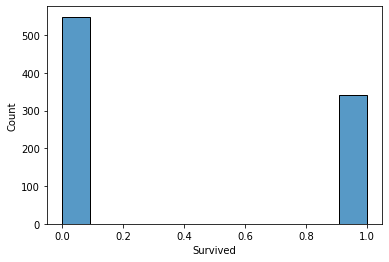

In [ ]:
# Distribution of target variable
sns.histplot(df['Survived'])

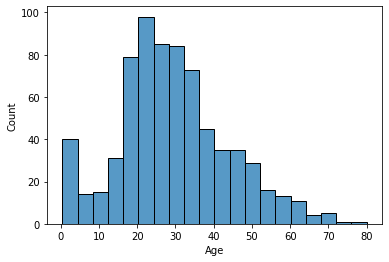

In [ ]:
# Distribution of Age
sns.histplot(df['Age'])

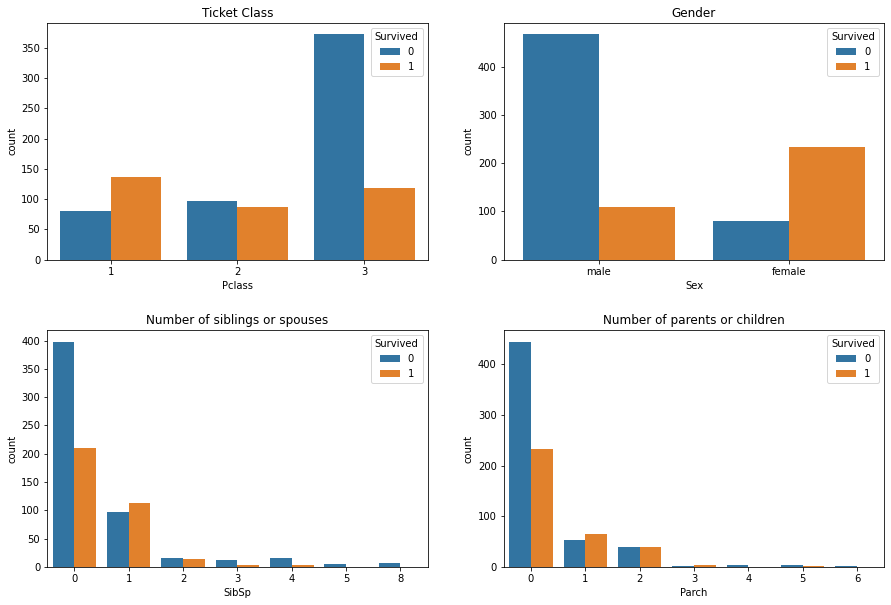

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.countplot(ax=axes[0, 0], data=df,x = 'Pclass', hue = 'Survived')
axes[0,0].set_title('Ticket Class')
sns.countplot(ax=axes[0, 1],data=df,x = 'Sex', hue = 'Survived')
axes[0,1].set_title('Gender')
sns.countplot(ax=axes[1, 0], data=df,x='SibSp',hue = 'Survived')
sns.move_legend(axes[1,0],"upper right")
axes[1,0].set_title('Number of siblings or spouses')
sns.countplot(ax=axes[1, 1],data=df,x='Parch',hue = 'Survived')
sns.move_legend(axes[1,1],"upper right")
axes[1,1].set_title('Number of parents or children')
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.3)


In [ ]:
# Fill in null values for Age and Embarked
df['Age']=df['Age'].fillna(df['Age'].median())
df.dropna(subset=['Embarked'],inplace=True) # 2 missing values

In [ ]:
# Split dataframe into features and target
X=df[['Pclass','Sex','SibSp','Parch','Fare','Embarked','Age']]
y=df['Survived'] # 0 for didn't survive and 1 for survived

In [ ]:
X.isna().sum().sum()

0

In [ ]:
X

,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age
0,3,male,1,0,7.2500,S,22.0
1,1,female,1,0,71.2833,C,38.0
2,3,female,0,0,7.9250,S,26.0
3,1,female,1,0,53.1000,S,35.0
4,3,male,0,0,8.0500,S,35.0
...,...,...,...,...,...,...,...
886,2,male,0,0,13.0000,S,27.0
887,1,female,0,0,30.0000,S,19.0
888,3,female,1,2,23.4500,S,28.0
889,1,male,0,0,30.0000,C,26.0


In [ ]:

categories_sex = {"female": 1, "male": 0}
X['Sex']= X['Sex'].map(categories_sex)

categories_embarked = {"S": 1, "C": 2, "Q": 3}
X['Embarked']= X['Embarked'].map(categories_embarked)
X.head()

,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age
0,3,0,1,0,7.2500,1,22.0
1,1,1,1,0,71.2833,2,38.0
2,3,1,0,0,7.9250,1,26.0
3,1,1,1,0,53.1000,1,35.0
4,3,0,0,0,8.0500,1,35.0


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Random Forest 

In [ ]:
# Instantiate Random Forest estimator
clf = RandomForestClassifier(n_estimators=100)

#Train the model using the training sets
clf.fit(X_train, y_train)

# predictions
y_pred = clf.predict(X_test)

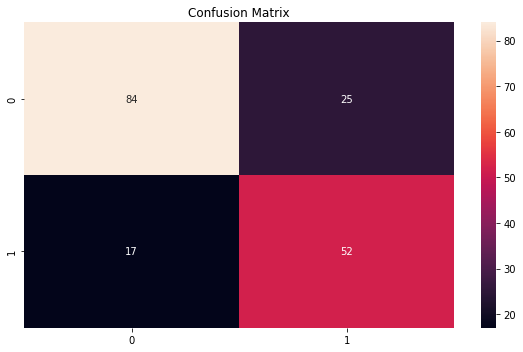

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,5))
sns.heatmap(conf_matrix, annot=True)
plt.title('Confusion Matrix')
plt.tight_layout()

In [ ]:
print("Accuracy: {}".format(metrics.accuracy_score(y_test, y_pred)))

Accuracy: 0.7640449438202247


# AdaBoost

In [ ]:
# Instantiate the model
ada = AdaBoostClassifier(learning_rate=1.0,
                              n_estimators=100)

# Train the model
ada.fit(X_train, y_train)

# making predictions
y_pred = ada.predict(X_test)


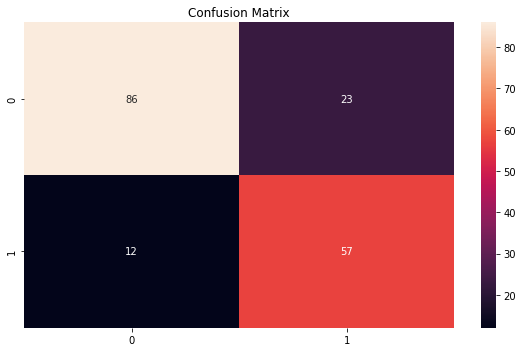

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,5))
sns.heatmap(conf_matrix, annot=True)
plt.title('Confusion Matrix')
plt.tight_layout()

In [ ]:
print("Accuracy: {}".format(metrics.accuracy_score(y_test, y_pred)))

Accuracy: 0.8033707865168539


Ways to make the models more robust: KFolds, cross validation, hyperparameter tuning

# Thank you!